In [2]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Import dataset
df =pd.read_csv("Dataset/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


--------------------------------------------------
EDA 
--------------------------------------------------
1. Null value analysis
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

2. Duplicate value analysis
127

removed/treated duplicates

recheck duplicates
0

3. Outlier analysis


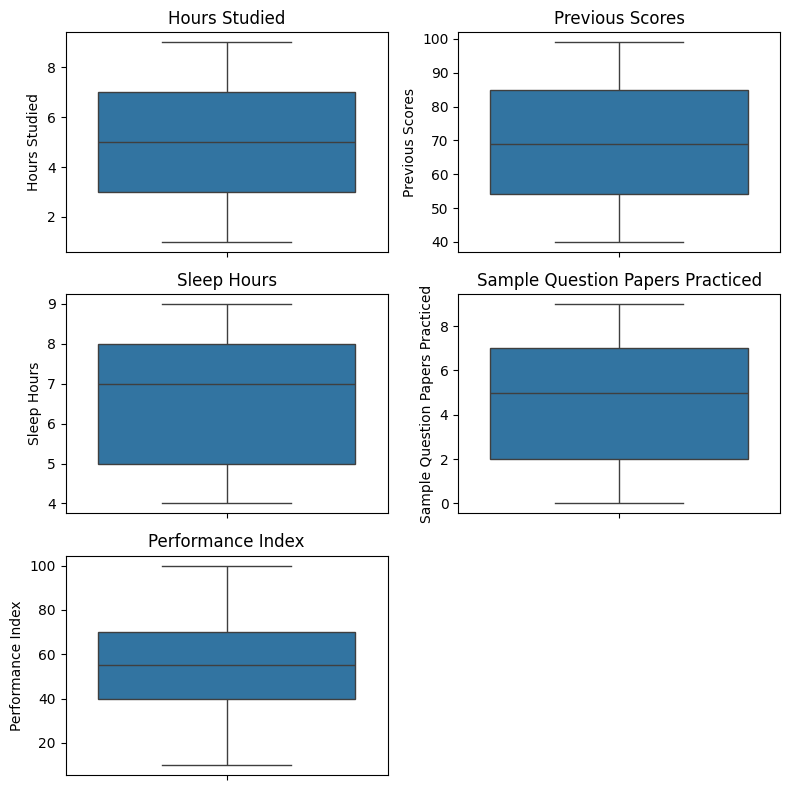

No outliers found

4. Correlation matrix


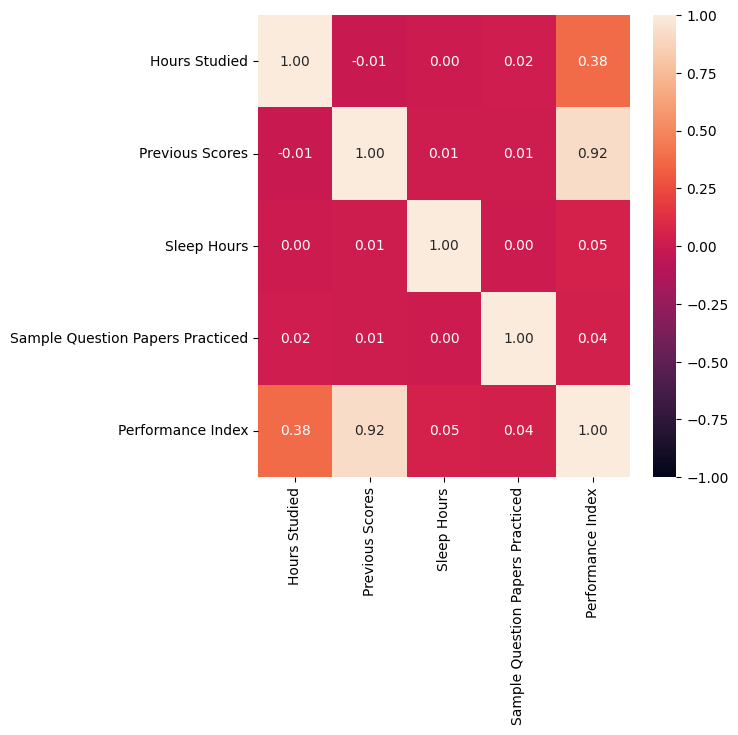


      Note:
      1. performance index shows high positive correlation with previous score
      2. Also it shows low to moderate positive correlation with hours studies

5. 5 point summery
                                   count       mean        std   min   25%  \
Hours Studied                     9873.0   4.992100   2.589081   1.0   3.0   
Previous Scores                   9873.0  69.441102  17.325601  40.0  54.0   
Sleep Hours                       9873.0   6.531652   1.697683   4.0   5.0   
Sample Question Papers Practiced  9873.0   4.583004   2.867202   0.0   2.0   
Performance Index                 9873.0  55.216651  19.208570  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  70.0  100.0  

6. Distribution

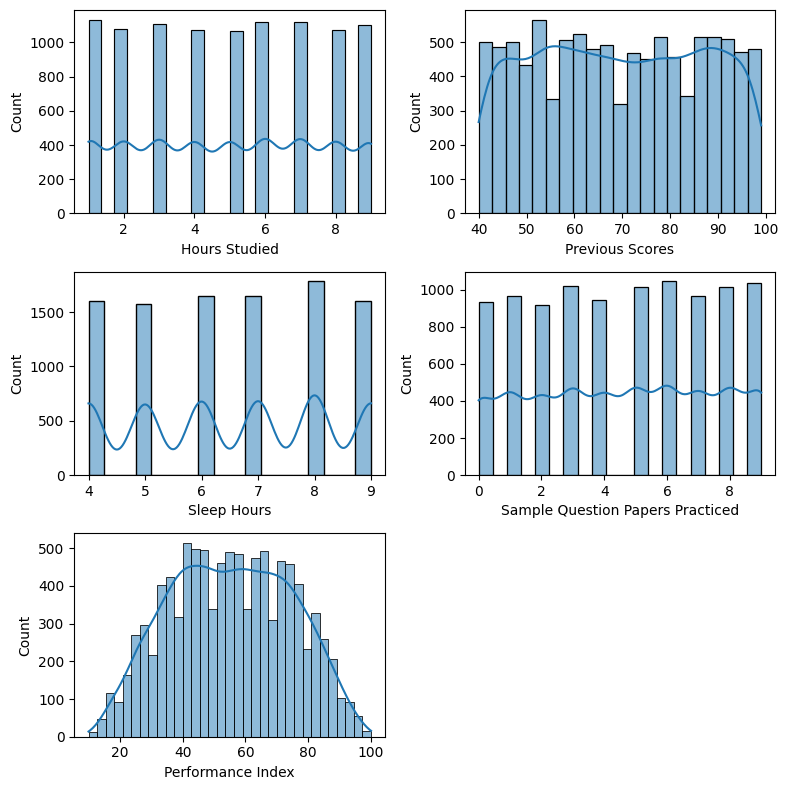

In [4]:
# EDA

print("-"*50)
print("EDA ")
print("-"*50)
print('1. Null value analysis')
print(df.isna().sum())
print()

print('2. Duplicate value analysis')
print(df.duplicated().sum())
print()

df = df.drop_duplicates()
print("removed/treated duplicates")
print()

print("recheck duplicates")
print(df.duplicated().sum())
print()

print('3. Outlier analysis')
num_df = df.select_dtypes(exclude='object')
plt.figure(figsize=[8,8])
for plot,i in enumerate(num_df):
    plt.subplot(3,2,plot+1)
    sns.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show()
print("No outliers found")
print()

print("4. Correlation matrix")
plt.figure(figsize=[6,6])
sns.heatmap(num_df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.show()
print("""
      Note:
      1. performance index shows high positive correlation with previous score
      2. Also it shows low to moderate positive correlation with hours studies""")
print()

print("5. 5 point summery")
print(df.describe().T)
print()

print('6. Distribution analysis')
num_df = df.select_dtypes(exclude='object')
plt.figure(figsize=[8,8])
for plot,i in enumerate(num_df):
    plt.subplot(3,2,plot+1)
    sns.histplot(df[i],kde=True)
plt.tight_layout()
plt.show()
print()


In [5]:
# Preprocessing

# train test split 
print("1. Train test split")
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index',axis=1)
y = df['Performance Index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=11)
print(f"""
train test data shapes:
X_train : {X_train.shape},
X_test : {X_test.shape},
y_train : {y_train.shape},
y_test : {y_test.shape}\n""")
print("Data splitted\n")

# Encoding
print("2. Encoding")
X_train['Extracurricular Activities'] = X_train['Extracurricular Activities'].map({"Yes":1,"No":0})
X_test['Extracurricular Activities'] = X_test['Extracurricular Activities'].map({"Yes":1,"No":0})
print("Encoding for X_train and X_test done\n")

1. Train test split

train test data shapes:
X_train : (7898, 5),
X_test : (1975, 5),
y_train : (7898,),
y_test : (1975,)

Data splitted

2. Encoding
Encoding for X_train and X_test done



Model fitted

r2 score for train data
0.9974596625457273

y_predict calculated 

r2 score for test data
0.9853950061594511

RMSE (root mean squared error)
2.3481267828513133

Prdiction analysis


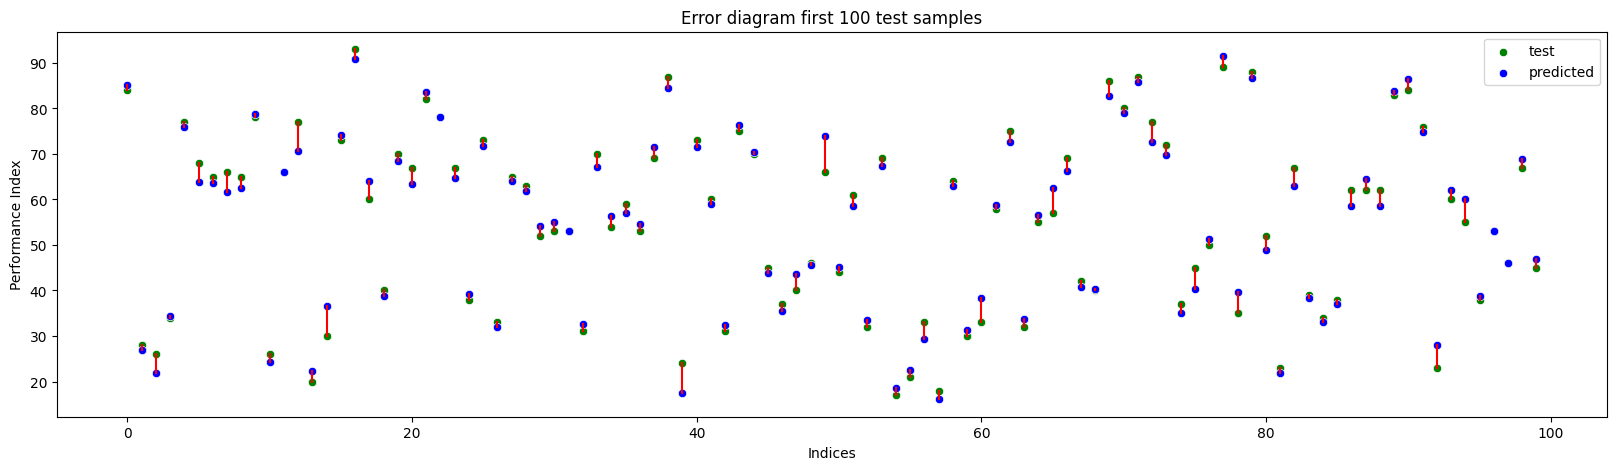

In [6]:
# Modeling

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,root_mean_squared_error

reg = RandomForestRegressor()
reg.fit(X_train,y_train)
print("Model fitted\n")

print("r2 score for train data")
print(reg.score(X_train,y_train))

y_pred = reg.predict(X_test)

print("\ny_predict calculated \n")

print("r2 score for test data")
print(reg.score(X_test,y_test))

print("\nRMSE (root mean squared error)")
print(root_mean_squared_error(y_test,y_pred))

print("\nPrdiction analysis")
yt = np.array(y_test[:100])
yp = y_pred[:100]
x = [i for i in range(0,len(yt),1)]
plt.figure(figsize=(20,5))
sns.scatterplot(x=x,y=yt,label='test',color='green')
sns.scatterplot(x=x,y=yp,label='predicted',color='blue')
for i,j,k in zip(yt,yp,x):
    plt.plot([k,k],[i,j],color='red')
plt.title("Error diagram first 100 test samples")
plt.xlabel("Indices")
plt.ylabel("Performance Index")
plt.show()

In [7]:
# Pickling model
import pickle
with open("Pickles/reg.pkl","wb") as file:
    pickle.dump(reg,file)

In [8]:
reg.feature_names_in_

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'], dtype=object)